# Udacity Wrangle and Analyze Data

## Introduction to the data

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as ***WeRateDogs.*** 

<b>WeRateDogs</b> is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." 

<b>WeRateDogs</b> has over 4 million followers and has received international media coverage.

## Gathering data

> For this project data is gathered from three sources :

- ***1. Enhanced Twitter Archive***
> The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

- ***2. Image Predictions File***
> One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

- ***3. Additional Data via the Twitter API***
> Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. 

<b>Importing required libraries for gathering </b>

In [139]:
#Importing all the libraries to use
import requests #for downloading data online
import pandas as pd # for importing and doing statictical calculation
import numpy as np # for statstical calculation

- ***Importing the Enhanced Twitter Archive***

In [140]:
# importing the enchanced twitter archive
df = pd.read_csv('twitter-archive-enhanced.csv')

- ***Importing Image Predictions File***

<b>Using the response library to download the content of the image prediction file </b>

In [141]:
img_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_response = requests.get(img_url)

<b>saving the content of the into a tsv file </b>

In [142]:
with open('image_predictions.tsv', mode ='wb') as file:
    file.write(img_response.content)

<b>importing the tsv file into dataframe</b>

In [143]:
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

- ***Importing additional file***

**Using request library to get the file**

In [144]:
txt_url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r = requests.get(txt_url)

**Storing the content into a .txt file**

In [145]:
with open('tweet_json.txt', mode ='wb') as file:
    file.write(r.content)

**Importing json file to use to read the file downloaded from twitter API**

In [146]:
import json

In [147]:
tweets_list =[]
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweets_list.append({'tweet_ID': tweet_id, 'retweet_count':retweet_count, 'favorite_count' : favorite_count})
        tweets_list

<b>importing the tsv file into dataframe</b>

In [148]:
# Reading the tweets_list into dataframe
twtcount = pd.DataFrame(tweets_list)

### Accessing Data

There are two types of assessment:

- ***Visual assessment***: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).

- ***Programmatic assessment***: pandas' functions and/or methods are used to assess the data.

#### Visual Assessment

In [149]:
#Displaying the twitter achive data
df

,/tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


`Enhanced twitter achive` columns:

- ***tweet_id***: the unique identifier for each tweet
- ***in_reply_to_status_id***: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- ***in_reply_to_user_id***: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- ***timestamp***: time when this Tweet was created
- ***source***: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- ***text***: actual UTF-8 text of the status update
- ***retweeted_status_id***: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- ***retweeted_status_user_id***: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- ***retweeted_status_timestamp***: time of retweet
- ***expanded_urls***: tweet URL
- ***rating_numerator***: numerator of the rating of a dog. Note: ratings almost always greater than 10
- ***rating_denominator***: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- ***name***: name of the dog
- ***doggo***: one of the 4 dog "stage"
- ***floofer***: one of the 4 dog "stage"
- ***pupper***: one of the 4 dog "stage"
- ***puppo***: one of the 4 dog "stage"

In [150]:
df.tail()

,/tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


**Displaying the image prediction data**

In [151]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


`image prediction` columns:
- **tweet_id**: is the last part of the tweet URL after "status/"
- **p1**: is the algorithm's #1 prediction for the image in the tweet
- **p1_conf**: is how confident the algorithm is in its #1 prediction
- **p1_dog**: is whether or not the #1 prediction is a breed of dog
- **p2**: is the algorithm's second most likely prediction
- **p2_conf**:  is how confident the algorithm is in its #2 prediction
- **p2_dog**: is whether or not the #2 prediction is a breed of dog
- **p3**: is the algorithm's Third most likely prediction
- **p3_conf**:  is how confident the algorithm is in its #3 prediction
- **p3_dog**: is whether or not the #3 prediction is a breed of dog

**Displaying the additional data**

In [152]:
twtcount

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


status_df (tweet status) columns:

- ***id***: the unique identifier for each tweet
- ***retweet_count***: number of times this Tweet has been retweeted
- ***favorite_count***: indicates approximately how many times this Tweet has been liked by Twitter users

### Quality

- the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp are mostly null values in `twitter achive` table
- Remove columns having retweet_id as we need only only original rating not retweets in `twitter achive` table
- inconsitency in the tweet_id column name in the the three tavles
- Some of the prediction are not dogs in the `image prediction` table

### Tidyness

- The doggo, pupper, poppo, and floofer columns should form a single colums called dog stage in `twitter achive` table
- The name and dog stage can be extracted from the text column in `twitter achive` table
- tweet_ID should be adjusted to tweet_id to conform with the two tables in the `additional file` table

#### Programatic Assessment

**Getting the info of the twitter achive data**

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   /tweet_id                   2356 non-null   object 
 1   in_reply_to_status_id       79 non-null     object 
 2   in_reply_to_user_id         79 non-null     object 
 3   timestamp                   2355 non-null   object 
 4   source                      2355 non-null   object 
 5   text                        2355 non-null   object 
 6   retweeted_status_id         182 non-null    object 
 7   retweeted_status_user_id    182 non-null    float64
 8   retweeted_status_timestamp  182 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   object 
 11  rating_denominator          2356 non-null   object 
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> **from the result above, we can deduce that**
- There are null values
- the two `in_reply_to` columns and `retweeted` have a lot of null values
- The /tweet_id needs to be will renamed
- the timestamp should be a datetime column
- rating_numerator and the rating_denominator should a interger column

**creating function to check for duplicated values in all columns**

In [154]:
def isnull(col, data):
    for i in col:
        print('The sum of null value in {}  is: {}'.format(i, data[i].isnull().sum()))

**calling the function on the twitter achive dataset**

In [155]:
#create a list of the column names
df_col = df.columns
# calling the isnull function with two arguments
isnull(df_col, df)

The sum of null value in /tweet_id  is: 0
The sum of null value in in_reply_to_status_id  is: 2277
The sum of null value in in_reply_to_user_id  is: 2277
The sum of null value in timestamp  is: 1
The sum of null value in source  is: 1
The sum of null value in text  is: 1
The sum of null value in retweeted_status_id  is: 2174
The sum of null value in retweeted_status_user_id  is: 2174
The sum of null value in retweeted_status_timestamp  is: 2174
The sum of null value in expanded_urls  is: 59
The sum of null value in rating_numerator  is: 0
The sum of null value in rating_denominator  is: 0
The sum of null value in name  is: 0
The sum of null value in doggo  is: 0
The sum of null value in floofer  is: 1
The sum of null value in pupper  is: 1
The sum of null value in puppo  is: 1


> From the result above, we can take notice of some repeated column having just 1 null values. We should track the row to know it is the same row that has the same row

**tracking the row with one null value**

In [156]:
df.loc[df.source.isnull()]

,/tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
8,89060925:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,None,None,None,NaN,NaN,NaN


> From the code above it is evident that it is the index 8 or row 8 that is causing the one null values reoccuring among the columns.

**creating function to check for duplicated values in all columns**

In [157]:
#creating function to check for duplicated values in all columns 
def dupli(col, data):
    for i in col:
        print('The sum of duplicated value in {}  is: {}'.format(i, data[i].duplicated().sum()))

**calling the function on the twitter achive dataset**

In [158]:
#create a list of the column names
df_col = df.columns

dupli(df_col, df)

The sum of duplicated value in /tweet_id  is: 0
The sum of duplicated value in in_reply_to_status_id  is: 2277
The sum of duplicated value in in_reply_to_user_id  is: 2323
The sum of duplicated value in timestamp  is: 0
The sum of duplicated value in source  is: 2350
The sum of duplicated value in text  is: 0
The sum of duplicated value in retweeted_status_id  is: 2173
The sum of duplicated value in retweeted_status_user_id  is: 2329
The sum of duplicated value in retweeted_status_timestamp  is: 2173
The sum of duplicated value in expanded_urls  is: 137
The sum of duplicated value in rating_numerator  is: 2314
The sum of duplicated value in rating_denominator  is: 2337
The sum of duplicated value in name  is: 1399
The sum of duplicated value in doggo  is: 2354
The sum of duplicated value in floofer  is: 2353
The sum of duplicated value in pupper  is: 2353
The sum of duplicated value in puppo  is: 2353


> From the table ablove there are only three columns that do not have duplicated data and there are many duplicated values in the dataset

In [159]:
# Sort by rating_denominator values
df.rating_denominator.value_counts().sort_index(ascending = True)

00         1
10      2332
11         3
110        1
120        1
130        1
15         1
150        1
16         1
170        1
2          1
20         2
40         1
50         3
7          1
70         1
80         2
90         1
None       1
Name: rating_denominator, dtype: int64

In [160]:
# Sort by rating_numerator values
df.rating_numerator.value_counts().sort_index()

0         2
007       1
1         9
10      461
11      464
12      558
121       1
13      350
14       54
143       1
144       1
15        2
165       1
17        1
1776      1
182       1
2         9
20        1
204       1
24        1
26        1
27        1
3        19
4        17
420       2
44        1
45        1
5        37
50        1
6        32
60        1
666       1
7        54
75        2
8       102
80        1
84        1
88        1
9       158
960       1
99        1
None      1
Name: rating_numerator, dtype: int64

In [161]:
# Sort by name values
df.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [162]:
df.name.value_counts()

None         746
a             55
Charlie       12
Oliver        11
Cooper        11
            ... 
Shikha         1
Kirk           1
Grizzwald      1
Cora           1
Mauve          1
Name: name, Length: 957, dtype: int64

- ***images***

**Getting the info of the image prediction data**

In [163]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> **from the result above, we can deduce that**
- There are no null values

**checking for null values using the fuction created ealier**

In [164]:
isnull(df_image.columns, df_image)

The sum of null value in tweet_id  is: 0
The sum of null value in jpg_url  is: 0
The sum of null value in img_num  is: 0
The sum of null value in p1  is: 0
The sum of null value in p1_conf  is: 0
The sum of null value in p1_dog  is: 0
The sum of null value in p2  is: 0
The sum of null value in p2_conf  is: 0
The sum of null value in p2_dog  is: 0
The sum of null value in p3  is: 0
The sum of null value in p3_conf  is: 0
The sum of null value in p3_dog  is: 0


> No null value was observed

**checking for duplicated values using the fuction created ealier**

In [165]:
dupli(df_image.columns, df_image)

The sum of duplicated value in tweet_id  is: 0
The sum of duplicated value in jpg_url  is: 66
The sum of duplicated value in img_num  is: 2071
The sum of duplicated value in p1  is: 1697
The sum of duplicated value in p1_conf  is: 69
The sum of duplicated value in p1_dog  is: 2073
The sum of duplicated value in p2  is: 1670
The sum of duplicated value in p2_conf  is: 71
The sum of duplicated value in p2_dog  is: 2073
The sum of duplicated value in p3  is: 1667
The sum of duplicated value in p3_conf  is: 69
The sum of duplicated value in p3_dog  is: 2073


> there are duplicated value

- ***Tweet count***

In [166]:
twtcount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_ID        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


**checking for null values using the fuction created ealier**

In [167]:
isnull(twtcount.columns, twtcount)

The sum of null value in tweet_ID  is: 0
The sum of null value in retweet_count  is: 0
The sum of null value in favorite_count  is: 0


> This implies that there are no null values

**checking for pulicate values using the fuction created ealier**

In [168]:
dupli(twtcount.columns, twtcount)

The sum of duplicated value in tweet_ID  is: 0
The sum of duplicated value in retweet_count  is: 630
The sum of duplicated value in favorite_count  is: 347


### Quality

##### twitter achive table

- tweet_id should be in string
- the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are all null values without duplicates, remove columns having retweet_id as we need only only original rating not retweets
- data issue rating denominator having 00 change to 0
- rating_denominator should be in int format as it is a rating number rather than strings
- rating_numerator should be in int format as it is a rating number rather than strings
- unneccesery html tags in the source column
- rating_numerator column has values less than 10 as well as some very large numbers
- rating_denominator column has values other than 10
- remove index 8 row as it has so many missing values
- Remove rows of tweets who tweet beyond august 1st, 2017
- remove the rows of tweet_ids that retweeted since retweets are essentially duplicates of the actual tweets and so they may skew the result of your analysis 
- observed error values in the rating column

#### Tidyness

##### twitter achive table
- The doggo, pupper, poppo, and floofer columns should form a single colums called dog stage
- The name and dog stage can be extracted from the text column
- convert timestamp to datetime column
- Remove tweets beyond august 1st, 2017 in order to be able to merge successful with image_id as there are no augorithm result for date beyond august 1st, 2017. 

##### images


##### twtcount
- tweet_ID should be renamed to tweet_id to conform with the two tables
- twtcount and df should be joined together and then joined with image data

## Cleaning

### Missing Data

- ***Twitter achive data***

**Making a copy of df on which the cleaning tasks will be performed**

In [169]:
df_clean = df.copy()
df_image_clean = df_image.copy()
twtcount_clean = twtcount.copy()

### case 1
##### Define
- remove index 8 row as it has so many missing values with tweet_id 89060925:51 +0000

##### Code

In [170]:
# Dropping the index 8 and assigning the new dataframe to df_clean
df_clean = df_clean.drop(df_clean.index[8])

##### Test

In [171]:
# Checking the head to see if the index 8 has been removed
df_clean.head(10)

,/tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


> From the result above the index 8 has been removed

In [172]:
# checking the null values again
isnull(df_clean.columns, df_clean)

The sum of null value in /tweet_id  is: 0
The sum of null value in in_reply_to_status_id  is: 2277
The sum of null value in in_reply_to_user_id  is: 2277
The sum of null value in timestamp  is: 0
The sum of null value in source  is: 0
The sum of null value in text  is: 0
The sum of null value in retweeted_status_id  is: 2174
The sum of null value in retweeted_status_user_id  is: 2174
The sum of null value in retweeted_status_timestamp  is: 2174
The sum of null value in expanded_urls  is: 59
The sum of null value in rating_numerator  is: 0
The sum of null value in rating_denominator  is: 0
The sum of null value in name  is: 0
The sum of null value in doggo  is: 0
The sum of null value in floofer  is: 0
The sum of null value in pupper  is: 0
The sum of null value in puppo  is: 0


### case 2
##### Define
- remove the rows of tweet_ids that retweeted since retweets are essentially duplicates of the actual tweets and so they may skew the result of your analysis 
- the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are mostly null values without duplicates, remove columns having retweet_id as we need only only original rating not retweets
- remove in_reply_to_status colums because they are insignificant here and have a lot of null values

##### Code

In [173]:
# creating a list of the columns to drop
del_column = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_timestamp', 
              'retweeted_status_id', 'retweeted_status_user_id']

# using the retweeted_status_id since they have the three columns have the same number of null values
index = df_clean[df_clean['retweeted_status_id'].isnull() == False].index

#Dropping the rows using the index and the axis argument
df_clean= df_clean.drop(index, axis=0)
#Dropping the columns 
df_clean= df_clean.drop(del_column, axis=1)

##### Test

In [174]:
#checking the first two rows to see if it has been removed
df_clean.head(2)

,/tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


> the columns have been successfully deleted and the rows has successfully be deleted

In [175]:
# checking the null values again
isnull(df_clean.columns, df_clean)

The sum of null value in /tweet_id  is: 0
The sum of null value in timestamp  is: 0
The sum of null value in source  is: 0
The sum of null value in text  is: 0
The sum of null value in expanded_urls  is: 58
The sum of null value in rating_numerator  is: 0
The sum of null value in rating_denominator  is: 0
The sum of null value in name  is: 0
The sum of null value in doggo  is: 0
The sum of null value in floofer  is: 0
The sum of null value in pupper  is: 0
The sum of null value in puppo  is: 0


> the expanded_url colum is the only column remaning having null values

### case 3 
##### Define
- Removing expanded_urls column as it appears that majority of the tweets having expanded_urls as null are reply to a main tweet which can serve as a duplicate

##### Code

In [176]:
#removing the expanded_url column 
df_clean= df_clean.drop('expanded_urls', axis=1)

##### Test

In [177]:
df_clean.head(2)

,/tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


In [178]:
# checking for any null value
df_clean.isnull().any()

/tweet_id             False
timestamp             False
source                False
text                  False
rating_numerator      False
rating_denominator    False
name                  False
doggo                 False
floofer               False
pupper                False
puppo                 False
dtype: bool

> So the issue with missing value on the achive data has been solved and there are no issue with missing value with the other data's

### Tidiness

### case 1
##### Define
- The doggo, pupper, poppo, and floofer columns should form a single colums called dog stage

##### code

In [179]:
# replace all NaN and 'None' dog_stage to an empty string
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

In [180]:
# group by dog_stage
df_clean.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns={0: 'count'})

,doggo,floofer,pupper,puppo,count
0,,,,,1830
1,,,,puppo,24
2,,,pupper,,224
3,,floofer,,,9
4,doggo,,,,75
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [181]:
# combine dog_stages into a single column
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

# fix multiple stage rows
df_clean.loc[df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_clean.loc[df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_clean.loc[df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [182]:
# drop previous dog stage columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [183]:
#printing the first two rows to confirm the new column
df_clean.head(2)

,/tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,


In [184]:
#counting the numbers based on the category of dog_stage
df_clean.dog_stage.value_counts()

                  1830
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

> From the result above we can find out that there are rows with two dog stage recorded

### case 2
##### Define
- tweet_id should be in string

##### code

In [185]:
#showing the columns so as to know where to merge on
display(df_clean.columns)
display(twtcount_clean.columns)
display(df_image_clean.columns)

Index(['/tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

Index(['tweet_ID', 'retweet_count', 'favorite_count'], dtype='object')

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [186]:
#creating a function that will convert string to integer datatype
def strtoint(col, data):
    data[col] =data[col].astype(str)
    return data[col]
    
strtoint('tweet_ID', twtcount_clean)
strtoint('tweet_id', df_image_clean)

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

##### code

In [187]:
#confirming if the datatype of twwwt_id has been corrected
twtcount_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_ID        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [188]:
#confirming if the datatype of twwwt_id has been corrected
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### case 4
##### Define
- merge twt_count table to the achive table

##### code

In [189]:
#showing the columns so as to know where to merge on
display(df_clean.columns)
display(twtcount_clean.columns)
display(df_image_clean.columns)

Index(['/tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

Index(['tweet_ID', 'retweet_count', 'favorite_count'], dtype='object')

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [190]:
#merge the copied twiitter achive data with the additional data on both axis
df_tweet_clean = df_clean.merge(twtcount_clean, left_on='/tweet_id', right_on='tweet_ID')
df_tweet_clean.rename(columns={'/tweet_id' : 'tweet_id'}, inplace = True)

##### test

In [191]:
#confirm the merge with no missing value
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2174 non-null   object
 1   timestamp           2174 non-null   object
 2   source              2174 non-null   object
 3   text                2174 non-null   object
 4   rating_numerator    2174 non-null   object
 5   rating_denominator  2174 non-null   object
 6   name                2174 non-null   object
 7   dog_stage           2174 non-null   object
 8   tweet_ID            2174 non-null   object
 9   retweet_count       2174 non-null   int64 
 10  favorite_count      2174 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 203.8+ KB


### case 4
##### Define
- merge df_img table to the df_tweet_clean table

##### code

In [192]:
#merge the new merged table with the image prediction data on both axis
df_tweet_clean = df_tweet_clean.merge(df_image_clean, left_on='tweet_id', right_on='tweet_id')

##### test

In [193]:
#confirm the merge with no missing value
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1993 non-null   object 
 1   timestamp           1993 non-null   object 
 2   source              1993 non-null   object 
 3   text                1993 non-null   object 
 4   rating_numerator    1993 non-null   object 
 5   rating_denominator  1993 non-null   object 
 6   name                1993 non-null   object 
 7   dog_stage           1993 non-null   object 
 8   tweet_ID            1993 non-null   object 
 9   retweet_count       1993 non-null   int64  
 10  favorite_count      1993 non-null   int64  
 11  jpg_url             1993 non-null   object 
 12  img_num             1993 non-null   int64  
 13  p1                  1993 non-null   object 
 14  p1_conf             1993 non-null   float64
 15  p1_dog              1993 non-null   bool   
 16  p2    

### Quality

### case 1
##### Define
- From df_ae, find and replace dog names with 'None' if possible.
- It appears that names that are lowercase tend to be invalid. Find and replace lowercase dog "names" if possible.
- Replace with NaN if no name is found.

##### code

In [194]:
# number of 'none' dog names
(df_tweet_clean.name == 'None').sum()

546

In [195]:
# list of lowercase dog names and 'None'
lower_list = list(df_tweet_clean[df_tweet_clean.name.str.islower()].name.value_counts().index)
lower_list.append('None')
lower_list

['a',
 'the',
 'an',
 'very',
 'one',
 'quite',
 'just',
 'getting',
 'all',
 'his',
 'not',
 'officially',
 'infuriating',
 'such',
 'by',
 'unacceptable',
 'my',
 'space',
 'incredibly',
 'actually',
 'light',
 'this',
 'None']

In [196]:
# query data frame where name matches 'a' and extract names
df_extract_names = df_tweet_clean[df_tweet_clean.name.str.match('a')].text.str.extract(r'(named\s\w+)').dropna()
df_extract_names

,0
1502,named Wylie
1599,named Kip
1678,named Jacob
1709,named Rufus
1759,named Spork
1768,named Cherokee
1771,named Hemry
1789,named Alphred
1803,named Alfredo
1832,named Leroi


In [197]:
# slice and replace name
df_tweet_clean.loc[df_extract_names.index, 'name'] = df_extract_names[0].str.slice(6)

In [198]:
# which records with name 'a' and dog name is included later in tweet
df_tweet_clean[df_tweet_clean.name.str.match('a')].text.str.contains('name is ')

48      False
471     False
581     False
745     False
747     False
756     False
761     False
782     False
865     False
918     False
928     False
1044    False
1053    False
1063    False
1064    False
1069    False
1081    False
1184    False
1355    False
1397    False
1440    False
1503    False
1526    False
1527    False
1568    False
1585    False
1638    False
1795    False
1839    False
1852    False
1862    False
1925     True
1964    False
1970    False
1971    False
1972    False
1984    False
1985    False
1986    False
1987    False
1989    False
1990    False
1991    False
Name: text, dtype: bool

In [199]:
df_tweet_clean.loc[1925]['text']

"This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"

In [200]:
# fix single name entry
df_tweet_clean.loc[1925, 'name'] = 'Daryl'

In [201]:
#replace the other lowercase names with None
df_tweet_clean['name'] =df_tweet_clean.name.replace(lower_list, 'None')

##### test

In [202]:
# check cleaned names
df_tweet_clean.name.value_counts()

None        623
Charlie      11
Lucy         10
Oliver       10
Cooper       10
           ... 
Herschel      1
Lorelei       1
Kaiya         1
William       1
Lugan         1
Name: name, Length: 932, dtype: int64

In [203]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1993 non-null   object 
 1   timestamp           1993 non-null   object 
 2   source              1993 non-null   object 
 3   text                1993 non-null   object 
 4   rating_numerator    1993 non-null   object 
 5   rating_denominator  1993 non-null   object 
 6   name                1993 non-null   object 
 7   dog_stage           1993 non-null   object 
 8   tweet_ID            1993 non-null   object 
 9   retweet_count       1993 non-null   int64  
 10  favorite_count      1993 non-null   int64  
 11  jpg_url             1993 non-null   object 
 12  img_num             1993 non-null   int64  
 13  p1                  1993 non-null   object 
 14  p1_conf             1993 non-null   float64
 15  p1_dog              1993 non-null   bool   
 16  p2    

### case 2
##### Define
- Extract keyword floof in the text column 
- convert to floofer
- add to the name column

##### code

In [204]:
# find index of all tweets where the text containts 'floof'
floof_index = df_tweet_clean[df_tweet_clean.text.str.contains('floof')].index
doggo_index = df_tweet_clean[df_tweet_clean.text.str.contains('doggo')].index
pupper_index = df_tweet_clean[df_tweet_clean.text.str.contains('pupper')].index
puppo_index = df_tweet_clean[df_tweet_clean.text.str.contains('puppo')].index

In [205]:
display('length of doggo is: {}'.format(len(doggo_index)))
display('length of floofer is: {}'.format(len(floof_index)))
display('length of pupper is: {}'.format(len(pupper_index)))
display('length of puppo is: {}'.format(len(puppo_index)))

'length of doggo is: 76'

'length of floofer is: 22'

'length of pupper is: 229'

'length of puppo is: 28'

In [206]:
# change 'floofer' category to 'floofer'
df_tweet_clean.loc[floof_index, 'dog_stage'] = 'floofer'
df_tweet_clean.loc[doggo_index, 'dog_stage'] = 'doggo'
df_tweet_clean.loc[pupper_index, 'dog_stage'] = 'pupper'
df_tweet_clean.loc[puppo_index, 'dog_stage'] = 'puppo'

##### test

In [207]:
#confirming cateroy
df_clean.dog_stage.value_counts()

                  1830
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

### case 3
##### Define
- convert timestamp to DateTime

##### code

In [208]:
#converting the timestamp column to datetime column
df_tweet_clean.timestamp = pd.to_datetime(df_tweet_clean.timestamp)

##### test

In [209]:
#confirming
df_tweet_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                   object
rating_denominator                 object
name                               object
dog_stage                          object
tweet_ID                           object
retweet_count                       int64
favorite_count                      int64
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
dtype: object

### case 4
##### Define
- extract source from the html link on the source column 

##### code

In [210]:
# define function to strip source link
def strip_url(x):
    return x.split('>', 1)[-1][:-4]

In [211]:
# apply to source column
df_tweet_clean['source'] = df_tweet_clean['source'].apply(strip_url)

##### Test

In [212]:
#confiming the extract and printing the result
df_tweet_clean['source'].value_counts()

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### case 5
##### Define
- Drop rows where all predictions of dog breed is not a dog

##### code 

In [213]:
# keep rows with at least one dog prediction
df_tweet_clean = df_tweet_clean.query('(p1_dog != False) or (p2_dog != False) or (p3_dog != False)')

##### test

In [214]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 1 to 1992
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1685 non-null   object             
 1   timestamp           1685 non-null   datetime64[ns, UTC]
 2   source              1685 non-null   object             
 3   text                1685 non-null   object             
 4   rating_numerator    1685 non-null   object             
 5   rating_denominator  1685 non-null   object             
 6   name                1685 non-null   object             
 7   dog_stage           1685 non-null   object             
 8   tweet_ID            1685 non-null   object             
 9   retweet_count       1685 non-null   int64              
 10  favorite_count      1685 non-null   int64              
 11  jpg_url             1685 non-null   object             
 12  img_num             1685 non-null 

### case 6
##### Define
- Removing data of days more than 1st August, 2017 from the twitter achive table

##### code

In [215]:
#checking for the timestamp that are greater than august 1st, 2017
df_tweet_clean[df_tweet_clean['timestamp'] > '2017-08-01']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,tweet_ID,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,,892177421306343426,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


> This just shows that there is time difference and there are no data with time more than august 

### case 7
##### Define
- convert rating_denominator and rating_denominator to int

##### code

In [216]:
#creating a list of the columns to be converted 
col = ['rating_numerator', 'rating_denominator']
df_tweet_clean[col] = df_tweet_clean[col].astype(int)

##### test

In [217]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 1 to 1992
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1685 non-null   object             
 1   timestamp           1685 non-null   datetime64[ns, UTC]
 2   source              1685 non-null   object             
 3   text                1685 non-null   object             
 4   rating_numerator    1685 non-null   int32              
 5   rating_denominator  1685 non-null   int32              
 6   name                1685 non-null   object             
 7   dog_stage           1685 non-null   object             
 8   tweet_ID            1685 non-null   object             
 9   retweet_count       1685 non-null   int64              
 10  favorite_count      1685 non-null   int64              
 11  jpg_url             1685 non-null   object             
 12  img_num             1685 non-null 

### case 8
##### Define
- convert dogstage and source column to category

##### code

In [218]:
#converting the dtypes of the source and the dog_stage column
df_tweet_clean.dog_stage = df_tweet_clean.dog_stage.astype('category')
df_tweet_clean.source = df_tweet_clean.source.astype('category')

##### test

In [219]:
#confirming the result
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 1 to 1992
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1685 non-null   object             
 1   timestamp           1685 non-null   datetime64[ns, UTC]
 2   source              1685 non-null   category           
 3   text                1685 non-null   object             
 4   rating_numerator    1685 non-null   int32              
 5   rating_denominator  1685 non-null   int32              
 6   name                1685 non-null   object             
 7   dog_stage           1685 non-null   category           
 8   tweet_ID            1685 non-null   object             
 9   retweet_count       1685 non-null   int64              
 10  favorite_count      1685 non-null   int64              
 11  jpg_url             1685 non-null   object             
 12  img_num             1685 non-null 

### case 9
##### Define
- Observed so many errors in the rating columns so i am going to extract the rating_numerator and rating denominator from the text column since it has the information
- Noticed some decimal values in the rating so we will  have to convert the rating_numerator and rating denominator to float
- replace the rating values in the rating_numerator and rating denominator column

##### code

In [235]:
ratings = df_tweet_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings.head()

,0,1
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10


In [238]:
# Replacing the rating_numerator and the rating_denominator column
df_tweet_clean.rating_numerator = ratings[0]
df_tweet_clean.rating_denominator = ratings[1]

#checking the datatype of the rating_numerator and rating_denominator 
df_tweet_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
rating_numerator                   object
rating_denominator                 object
name                               object
dog_stage                        category
tweet_ID                           object
retweet_count                       int64
favorite_count                      int64
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
dtype: object

In [239]:
#creating a list of the columns to be converted 
col = ['rating_numerator', 'rating_denominator']
#converting the column to float to accumodate the decimal values
df_tweet_clean[col] = df_tweet_clean[col].astype(float)

##### Test

In [241]:
df_tweet_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,tweet_ID,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,892177421306343426,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,891815181378084864,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [242]:
df_tweet_clean.rating_numerator.value_counts()

12.00     423
10.00     360
11.00     356
13.00     228
9.00      133
8.00       68
7.00       32
14.00      23
6.00       16
5.00       13
4.00        7
3.00        5
2.00        2
165.00      1
1.00        1
121.00      1
11.26       1
144.00      1
0.00        1
50.00       1
44.00       1
9.75        1
84.00       1
60.00       1
88.00       1
99.00       1
45.00       1
13.50       1
11.27       1
24.00       1
80.00       1
143.00      1
Name: rating_numerator, dtype: int64

In [243]:
df_tweet_clean.rating_denominator.value_counts()

10.0     1668
50.0        3
80.0        2
11.0        2
150.0       1
20.0        1
70.0        1
90.0        1
130.0       1
40.0        1
110.0       1
2.0         1
7.0         1
120.0       1
Name: rating_denominator, dtype: int64

 > From the code result above the issue has been solved

## Storing the data

In [244]:
#Exporting the dataframe to csv
df_tweet_clean.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

## Analyzing the data

In [245]:
# For analysis, create a copy of the cleaned twitter archive data
df = df_tweet_clean.copy()

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 1 to 1992
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1685 non-null   object             
 1   timestamp           1685 non-null   datetime64[ns, UTC]
 2   source              1685 non-null   category           
 3   text                1685 non-null   object             
 4   rating_numerator    1685 non-null   float64            
 5   rating_denominator  1685 non-null   float64            
 6   name                1685 non-null   object             
 7   dog_stage           1685 non-null   category           
 8   tweet_ID            1685 non-null   object             
 9   retweet_count       1685 non-null   int64              
 10  favorite_count      1685 non-null   int64              
 11  jpg_url             1685 non-null   object             
 12  img_num             1685 non-null 

In [264]:
df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1.685000e+03
mean,11.421234,10.534718,2816.161424,9221.837982,1.216024,0.605220,0.137114,6.132474e-02
std,7.941628,6.947941,4808.466351,12578.465401,0.576338,0.266480,0.101273,5.187743e-02
min,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,10.000000,10.000000,649.000000,2163.000000,1.000000,0.378643,0.054933,1.596500e-02
50%,11.000000,10.000000,1436.000000,4437.000000,1.000000,0.606747,0.121377,4.991380e-02
75%,12.000000,10.000000,3244.000000,11650.000000,1.000000,0.852088,0.198451,9.466370e-02
max,165.000000,150.000000,79515.000000,132810.000000,4.000000,0.999984,0.467678,2.734190e-01


> ***Most used twitter source***

In [246]:
df['source'].value_counts()

Twitter for iPhone    1654
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

- From the code above, we can deduce that majority of the twitter source was gotten from tweets from iphone

> ***Analysis of retweet and favorite counts***

In [247]:
print('%s\t%s' % ('Mean Retweet Count', round(df.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(df.favorite_count.mean())))

Mean Retweet Count	2816
Mean Favorite Count	9222


- From the code above, we could deduce that the mean retweet count is 3043 and mean favorite count is 8884

> ***Number of tweets posted by WeRateDogs over time***

In [248]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    226
2015-12    289
2016-01    141
2016-02     96
2016-03    107
2016-04     50
2016-05     48
2016-06     69
2016-07     78
2016-08     47
2016-09     57
2016-10     60
2016-11     45
2016-12     52
2017-01     59
2017-02     60
2017-03     44
2017-04     34
2017-05     36
2017-06     41
2017-07     45
2017-08      1
Name: timestamp, dtype: int64

> From the code above, we could deduce that the number of retweet posted over time reduce as from 2015 until 2017

> **Analysis on rating of dogs**

In [254]:
#printing the counts of each rating_numerator values in ascending pattern 
df['rating_numerator'].value_counts().sort_index()

0.00        1
1.00        1
2.00        2
3.00        5
4.00        7
5.00       13
6.00       16
7.00       32
8.00       68
9.00      133
9.75        1
10.00     360
11.00     356
11.26       1
11.27       1
12.00     423
13.00     228
13.50       1
14.00      23
24.00       1
44.00       1
45.00       1
50.00       1
60.00       1
80.00       1
84.00       1
88.00       1
99.00       1
121.00      1
143.00      1
144.00      1
165.00      1
Name: rating_numerator, dtype: int64

In [255]:
len(df)

1685

In [253]:
df['rating_numerator'][df['rating_numerator'] > 10].value_counts().sum()

1046

In [256]:
print('the percent of dogs rated above 10 is: {}'.format((df['rating_numerator'][df['rating_numerator'] > 10].value_counts().sum())/len(df)))

the percent of dogs rated above 10 is: 0.6207715133531158


> This shows that out of the 1685 entries there are are 1046 dogs that are rated above 10. That's 62 percent of the total dog rated at WeRateDog

## Visualization

In [258]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

> ***Distribution of the favourite counts (likes)***

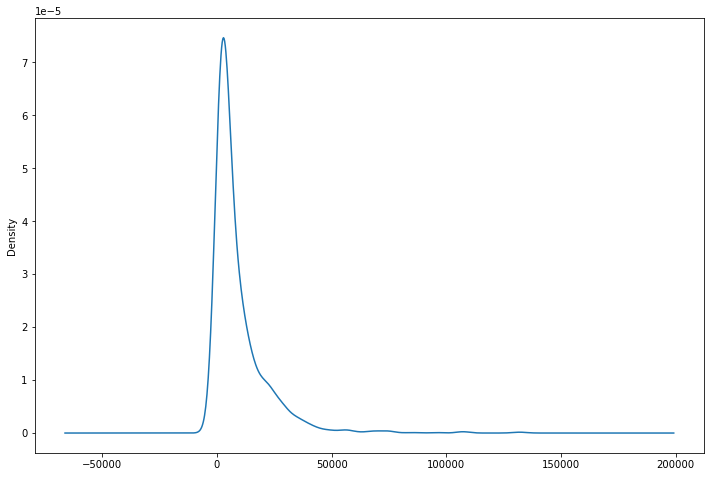

In [268]:
df.favorite_count.plot(kind = 'density')
plt.savefig('fav_plot.png')

> the plot above shows that the `favourite_count` is skewed to the right and not normally distributed. Skewing to the right means it is positively skewed

> ***Distribution of the Retweet counts***

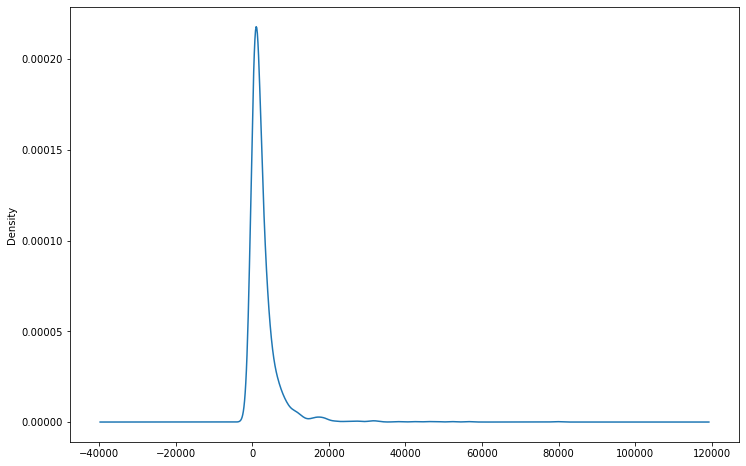

In [270]:
df.retweet_count.plot(kind = 'density')
plt.savefig('rt_plot.png')

> the plot above shows that the `retweet_count` is skewed to the right and not normally distributed. Skewing to the right means it is positively skewed

> ***Most twitter source***

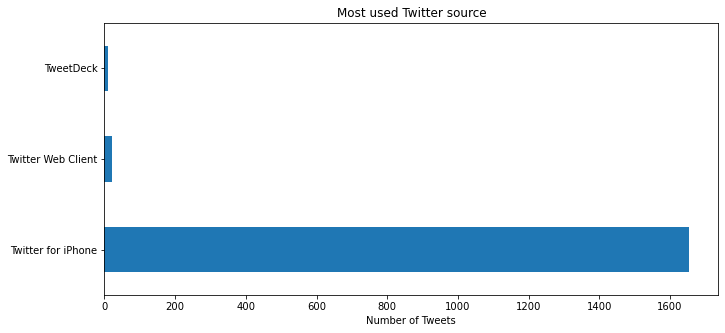

In [259]:
df['source'].value_counts().plot(kind = 'barh',figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

> The image above confirm that the iPhone has the most sources, followed by the twitter web client with TweetDeck having the least

> ***Dog Stage Analysis as Related to retweet Count***

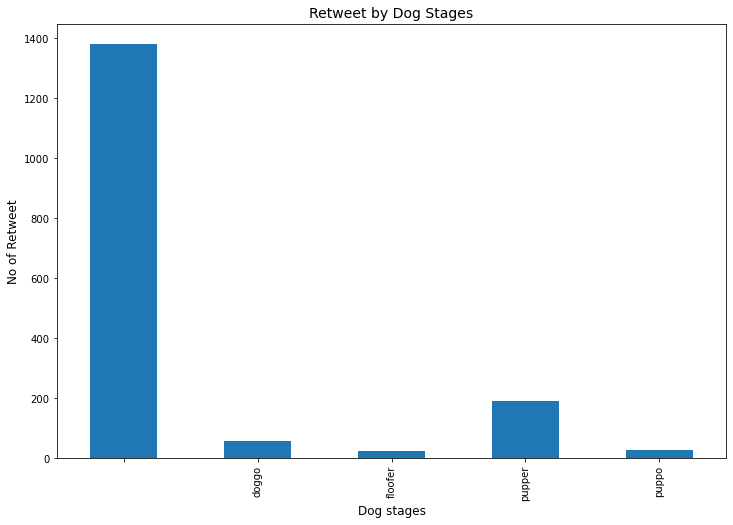

In [276]:
df.groupby('dog_stage')['retweet_count'].count().plot(kind = 'bar')
plt.title('Retweet by Dog Stages', fontsize = 14)
plt.xlabel('Dog stages', fontsize = 12)
plt.ylabel('No of Retweet', fontsize = 12)
plt.savefig('rt_dog-stage.png')

> the visualization above showes that the Pupper Dog stage is the most popular dog stage, as it has the highest number of retweets, followed by Doggo and Puppo and Floofer is the least.

> ***Dog Stage Analysis as Related to favorite Count***

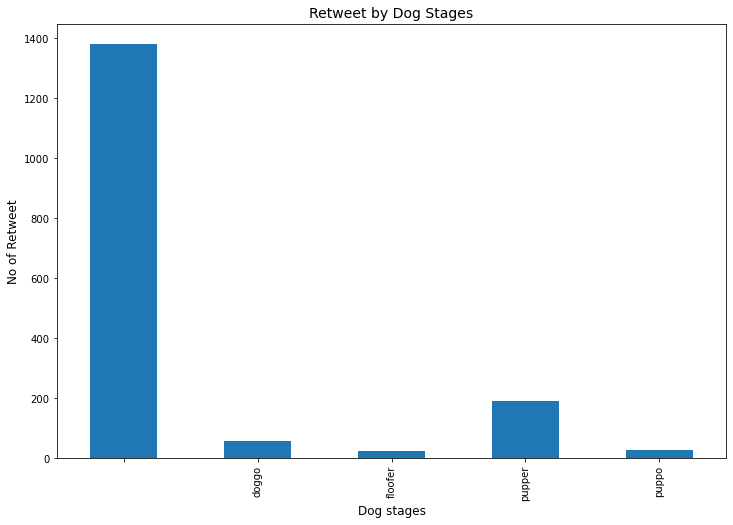

In [275]:
df.groupby('dog_stage')['favorite_count'].count().plot(kind = 'bar')
plt.title('Retweet by Dog Stages', fontsize = 14)
plt.xlabel('Dog stages', fontsize = 12)
plt.ylabel('No of Retweet', fontsize = 12)
plt.savefig('fav_dog-stage.png')

> the visualization above showes that the Pupper Dog stage is the most liked dog stage, as it has the highest number of favourite_count, followed by Doggo and Puppo and floofer being the least

> ***Checking the top 6 common dog name***

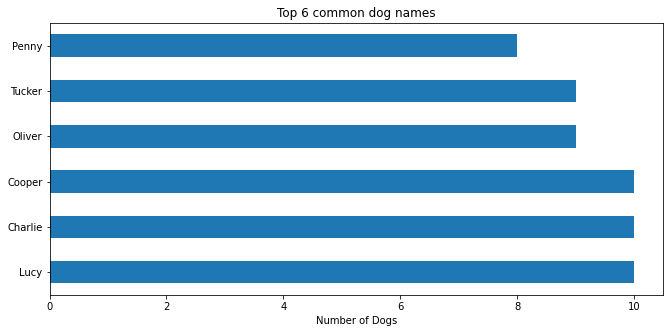

In [260]:
df.name.value_counts()[1:7].plot(kind='barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

> The image above confirm our stated observation above 

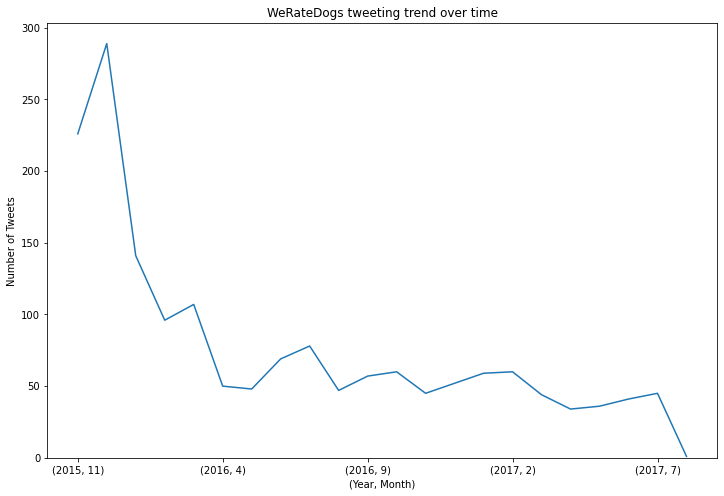

In [261]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot(kind='line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

> The image above confirm our stated observation above 

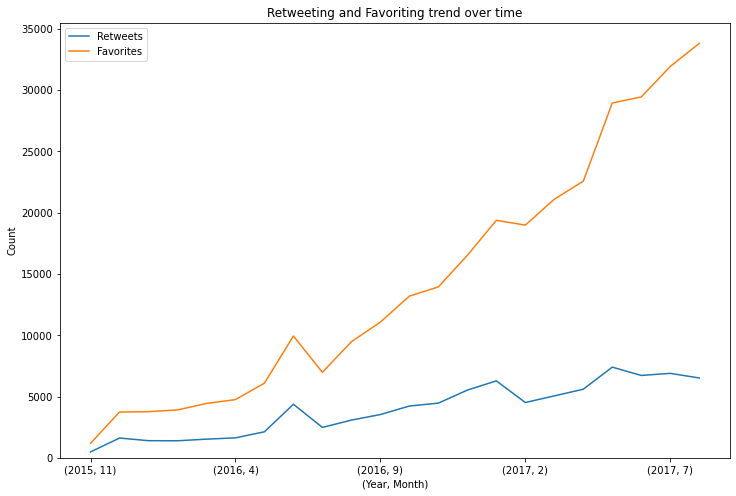

In [277]:
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot(kind ='line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot(kind='line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav.png')

> The above plot shows an increasing trend of retweeting and favoriting tweets posted by WeRateDogs' since
November, 2015. However, the favoriting trend shows a much higher increase with time as compared to the
retweeting trend.